## Continuous Distributions
An example of a continuous distribution is a Gaussian (or Normal) distibution, which describes the probability density of a range of values in a symmetrical distribution about the average (or mean) of the values. The Standard Normal distribution is a special case of the Gaussian in which the mean is located at zero,and the horizontal axis displays the number of standard deviations from the mean.

In [36]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

Below, sigmas_1 is an array of varied values for the variable sigma, which represents the standard deviation of a value from the mean if it were in a standard normal distribution. This is followed by probs_1, which is an array of the calculated probabilities associated with each value of sigma. They are calculated by integrating the probability density function from the sigma value to negative infinity, giving the probability that the data (without a signal present) would give a measurement that corresponds to a sigma equal to or less than the specified value of sigma.

The inverse of this relationship returns sigmas given a variety of probabilities, as shown by sigmas_2. This confirms that one function is the inverse of the other, as plugging the results of the first into the second returns to us the array of sigmas we started with. Those which are negative describe sigmas corresponding to measurements less than the mean.

In [41]:
sigmas_1 = np.array([-4.0,-3.5,-2.0,0.0,1.5,4.0])

In [42]:
probs_1 = stats.norm.cdf(sigmas_1,loc=0,scale=1)

In [44]:
print(probs_1)

[3.16712418e-05 2.32629079e-04 2.27501319e-02 5.00000000e-01
 9.33192799e-01 9.99968329e-01]


In [45]:
sigmas_2 = stats.norm.ppf(probs_1,loc=0,scale=1)
print(sigmas_2)

[-4.  -3.5 -2.   0.   1.5  4. ]



Another example of a continuous distribution function is the Lognormal distribution. This is a distribution that occurs when the logarithm of a variable shows a normal, symmetrical distribution, while the original lognormal distribution is asymmetrical with a higher probability density on the left of the distribution and a long tail to the right.

In [6]:
from scipy.stats import lognorm

plt.rcParams["figure.figsize"] = (15,10)

Below is a plot of a lognormal distribution.

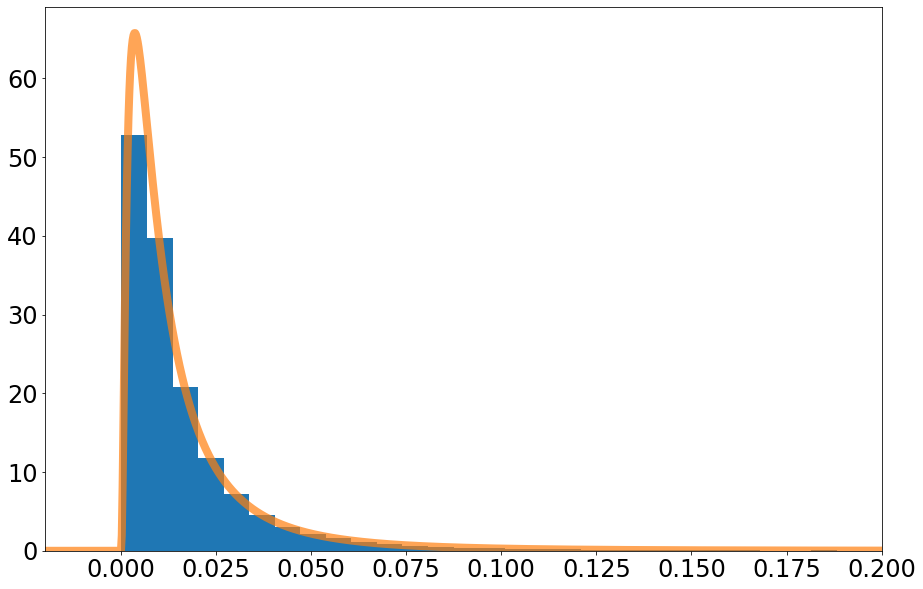

In [7]:
s = 1
d = stats.lognorm.rvs(s, loc = 0, scale = 0.01, size = 100000)

# plotting a histogram
fig, ax = plt.subplots(1, 1)
ax.hist(d, 100, density=True)   # d is the distribution defined above, 100 is the # of bins in the histogram, and density=True returns the probability density
plt.tick_params(labelsize = 24)
plt.xlim([-0.02,0.2])
x = np.linspace(-0.02, 0.2, 1000)
ax.plot(x, stats.lognorm.pdf(x, s, loc = 0, scale = 0.01), linewidth = 8, alpha = 0.7)  # alpha designates opaqueness of curve
plt.show()

The plot that follows is a lognormal plot with the vertical on a logorithmic scale.

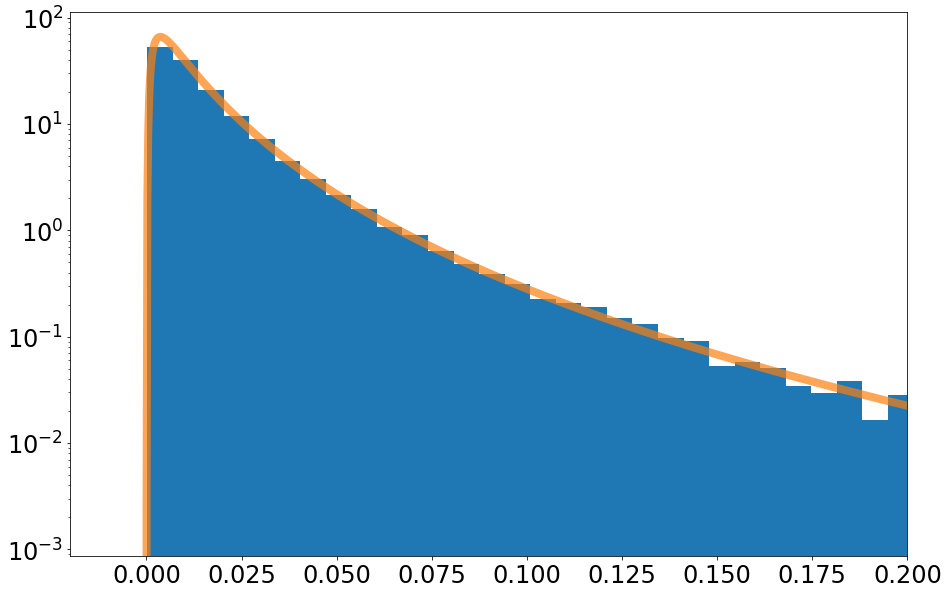

In [8]:
fig, ax = plt.subplots(1, 1)
ax.hist(d, 100, density=True)
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.xlim([-0.02, 0.2])
x = np.linspace(-0.02, 0.2, 1000)
ax.plot(x, stats.lognorm.pdf(x, s, loc = 0, scale = 0.01), linewidth = 8, alpha = 0.7)
plt.show()

In contrast, the following plot shows the horizontal axis on a logarithmic scale. This shows what was previously stated; the logarithmic scale produces a Gaussian distribution. As we can see, however, the bins of the histogram are not symmetrically distributed around the mean. This indicates that it is still the asymmetrical lognormal distribution from before. The number of bins was increased by a factor of 10 in order to better show how it follows a Gaussian distribution.

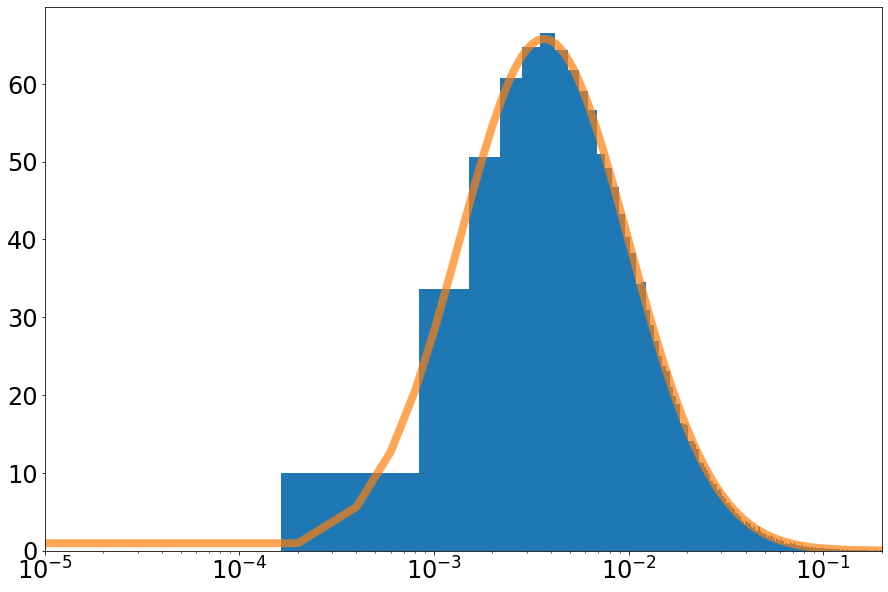

In [9]:
fig, ax = plt.subplots(1, 1)
ax.hist(d, 1000, density=True)
plt.xscale('log')
plt.tick_params(labelsize = 24)
plt.xlim([0.00001, 0.2])
x = np.linspace(0, 0.2, 1000)
ax.plot(x, stats.lognorm.pdf(x, s, loc = 0, scale = 0.01), linewidth = 8, alpha = 0.7)
plt.show()

If we choose that we have a measurement m of some value, we can use it to ask and answer statistical questions about the lognormal distribution.

In [10]:
m_1 = 0.06

For instance, we can ask: What is the probability that, given a signal-free background, we would make a measurement that is equal to or less than m?

As shown below, for a measurement m=0.06, the probability is approximately 0.96.

In [11]:
P_m_1_plus = stats.lognorm.cdf(m_1, s, loc=0, scale=0.01)
print(P_m_1_plus)

0.9634142480829571


The sigma that corresponds to that probability is then found by relating the probability to the corresponding sigma it would be in a normal distribution.

In [12]:
S_m_1 = stats.norm.ppf(P_m_1_plus, loc=0, scale=0.01)
print(S_m_1)

0.017917594692280544


Trying this same procedure for a variety of measurements shows the relationship we would expect to see; as the measurement value increases, the probability of making a measurement of a value lower than that which was made also increases. Furthermore, translating the probabilities into sigmas shows the asymmetry present in the distribution, as the sigmas are not large despite how the measurements appear to be distributed in the plot above.

In [47]:
m_var = np.array([1e-4,5e-3,2e-2,8e-2,1e-1,4e-1])
P_m_var = stats.lognorm.cdf(m_var, s, loc=0, scale=0.01)
print(P_m_var)

[2.06064340e-06 2.44108596e-01 7.55891404e-01 9.81211607e-01
 9.89348901e-01 9.99887378e-01]


In [52]:
S_m_var = stats.norm.ppf(P_m_var, loc=0, scale=0.01)
print(S_m_var)

[-0.0460517  -0.00693147  0.00693147  0.02079442  0.02302585  0.03688879]


## Non-continuous Distributions
Non-continuous distributions are made up of a discrete number of measurements that correspond to events (such as counting the number of particular items as they do a particular thing).

An example of this is the Binomial distribution, which is a probability distribution that posits a binary yes-or-no system for measurement such that, given the probability of success, the probability of failure, the number of trials, and the number of successful (or unsuccessful) outcomes, there is a discrete number of symmetrically distributed probabilities corresponding to the outcomes.

In [18]:
from scipy.stats import binom

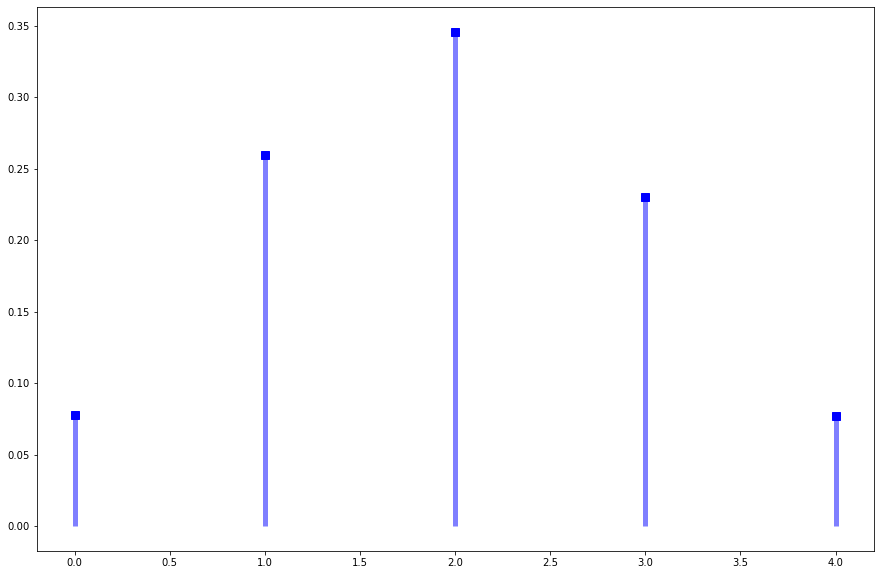

In [20]:
fig, ax = plt.subplots(1,1)
n, p = 5, 0.4
x = np.arange(stats.binom.ppf(0.01, n, p), stats.binom.ppf(0.99, n, p))
ax.plot(x, stats.binom.pmf(x, n, p), 'bs', ms=8)
ax.vlines(x, 0, stats.binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
plt.show()

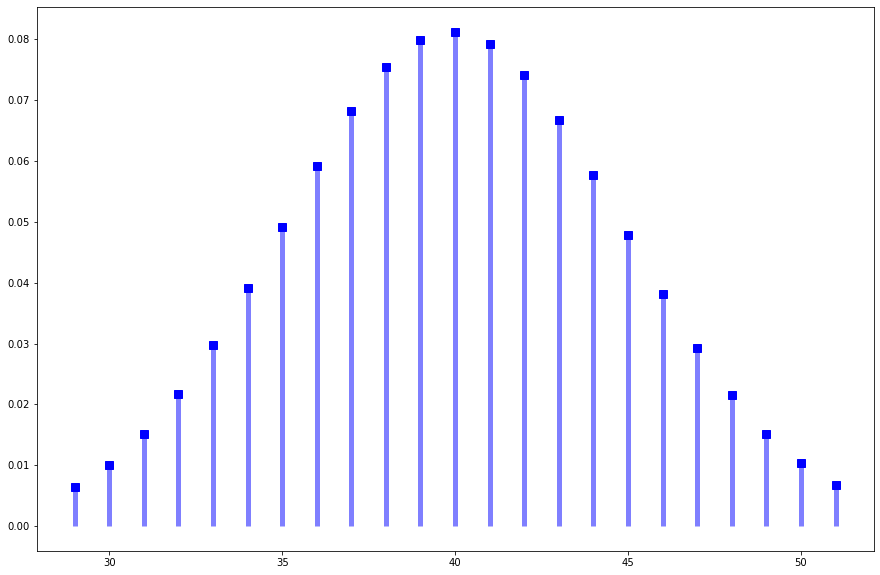

In [21]:
fig, ax = plt.subplots(1,1)
n, p = 100, 0.4
x = np.arange(stats.binom.ppf(0.01, n, p), stats.binom.ppf(0.99, n, p))
ax.plot(x, stats.binom.pmf(x, n, p), 'bs', ms=8)
ax.vlines(x, 0, stats.binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
plt.show()

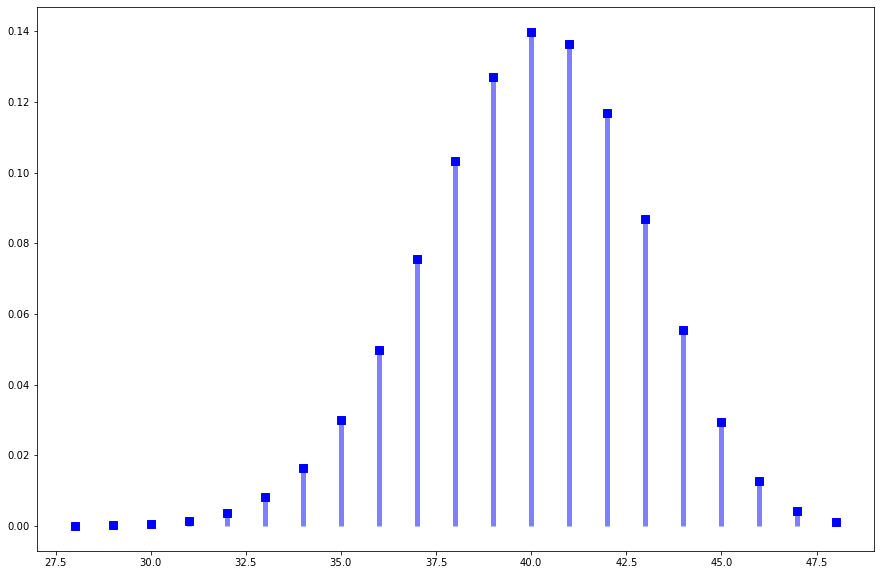

In [33]:
fig, ax = plt.subplots(1,1)
n, p = 50, 0.8
x = np.arange(stats.binom.ppf(0.0001, n, p), stats.binom.ppf(0.9999, n, p))
ax.plot(x, stats.binom.pmf(x, n, p, loc=0), 'bs', ms=8)
ax.vlines(x, 0, stats.binom.pmf(x, n, p, loc=0), colors='b', lw=5, alpha=0.5)
plt.show()

In [35]:
print(stats.binom.pmf(x, n, p))
print(np.sum(stats.binom.pmf(x, n, p)))

[7.20024042e-05 2.18490054e-04 6.11772152e-04 1.57876684e-03
 3.74957125e-03 8.18088273e-03 1.63617655e-02 2.99186568e-02
 4.98644281e-02 7.54704857e-02 1.03275402e-01 1.27108187e-01
 1.39819005e-01 1.36408786e-01 1.16921816e-01 8.70115841e-02
 5.53710081e-02 2.95312043e-02 1.28396540e-02 4.37094606e-03
 1.09273651e-03]
0.9997771496821569


Because the distributions are discrete, probabilities can only ever be discrete as they are dependent on the number of trials. Therefore, sigmas must also be dicrete.

However, parameters such as means do not have to be discrete because they describe an average rather than an event.